# Content

* [Dataset Description](#1.0-Dataset-Description)
* [EDA](#2.0-EDA)
* [Data Preprocessing](#3.0-Data-Preprocessing)
* [Splitting the Dataset](#4.0-Splitting-the-Dataset)
* [Modelling](#5.0-Modelling)
* [Evaluation](#6.0-Evaluation)

# Import libraries

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing the dataset

In [3]:
df = pd.read_csv('riceClassification.csv')

# 1.0 Dataset Description

In [4]:
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [5]:
print('Total number of rows are:', df.shape[0])
print('Total number of columns are:', df.shape[1])

Total number of rows are: 18185
Total number of columns are: 12


In [6]:
columns=df.columns.to_list()
print(columns)

['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness', 'AspectRation', 'Class']


**All attributes are numeric variables and they are listed as below:**

* id
* Area
* MajorAxisLength
* MinorAxisLength
* Eccentricity
* ConvexArea
* EquivDiameter
* Extent
* Perimeter
* Roundness
* AspectRation
* Class

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


**It is clear from the above output that there are no categorical columns present in the dataset.**

In [8]:
df.isna().sum(axis=0)

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

**The number of missing values are counted in each column. Based on the above output, there are no missing values in the columns.**

In [9]:
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


**INFERENCE**
* The dataset contains 10 features (Area to AspectRation) and 1 label (Class).
* There are 18,185 entries of data which is quite ideal for building Machine Learning model.
* There are no categorical columns present in the dataset. Most of the features are of float64 datatype.
* There are no missing value in any features or data i.e. the dataset is quite clean.

# 2.0 EDA

### The Distribution of the Class Column

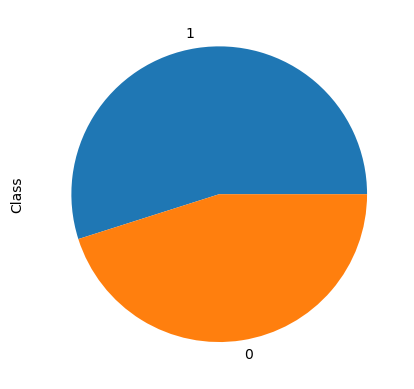

In [10]:
# Checking whether dataset is balanced or not
piechart = df['Class'].value_counts().plot(kind='pie')
fig1 = piechart.get_figure()

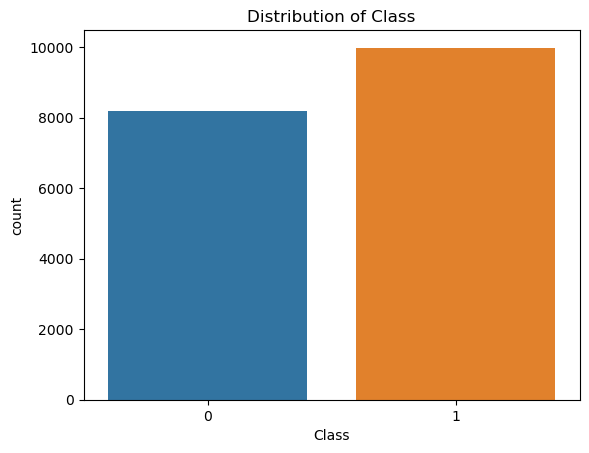

In [11]:
import seaborn as sns
# Check the distribution of Class
sns.countplot(x='Class', data=df)
plt.title('Distribution of Class')
plt.show()

**From the above bar chart, the class output are relatively well-balanced and no sampling is required.**

###  Drop id column

In [12]:
df = df.drop(columns = 'id', axis = 1)

### Building correlation matrix

In [13]:
correlation_mat=df.corr()
correlation_mat

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
Area,1.000000,0.599939,0.930215,-0.550073,0.999362,0.998158,0.230541,0.881540,0.620490,-0.623979,-0.816589
MajorAxisLength,0.599939,1.000000,0.273211,0.295717,0.602061,0.618002,-0.073549,0.870178,-0.202566,0.240471,-0.147741
MinorAxisLength,0.930215,0.273211,1.000000,-0.808640,0.928992,0.923790,0.308541,0.674249,0.834398,-0.860516,-0.917766
Eccentricity,-0.550073,0.295717,-0.808640,1.000000,-0.547896,-0.534688,-0.329954,-0.165915,-0.903657,0.950301,0.788636
ConvexArea,0.999362,0.602061,0.928992,-0.547896,1.000000,0.997403,0.227359,0.886987,0.610236,-0.621472,-0.814214
EquivDiameter,0.998158,0.618002,0.923790,-0.534688,0.997403,1.000000,0.225944,0.891567,0.607432,-0.609957,-0.809361
Extent,0.230541,-0.073549,0.308541,-0.329954,0.227359,0.225944,1.000000,0.073227,0.366793,-0.350875,-0.303440
Perimeter,0.881540,0.870178,0.674249,-0.165915,0.886987,0.891567,0.073227,1.000000,0.186063,-0.227256,-0.533274
Roundness,0.620490,-0.202566,0.834398,-0.903657,0.610236,0.607432,0.366793,0.186063,1.000000,-0.947875,-0.831759
AspectRation,-0.623979,0.240471,-0.860516,0.950301,-0.621472,-0.609957,-0.350875,-0.227256,-0.947875,1.000000,0.832563


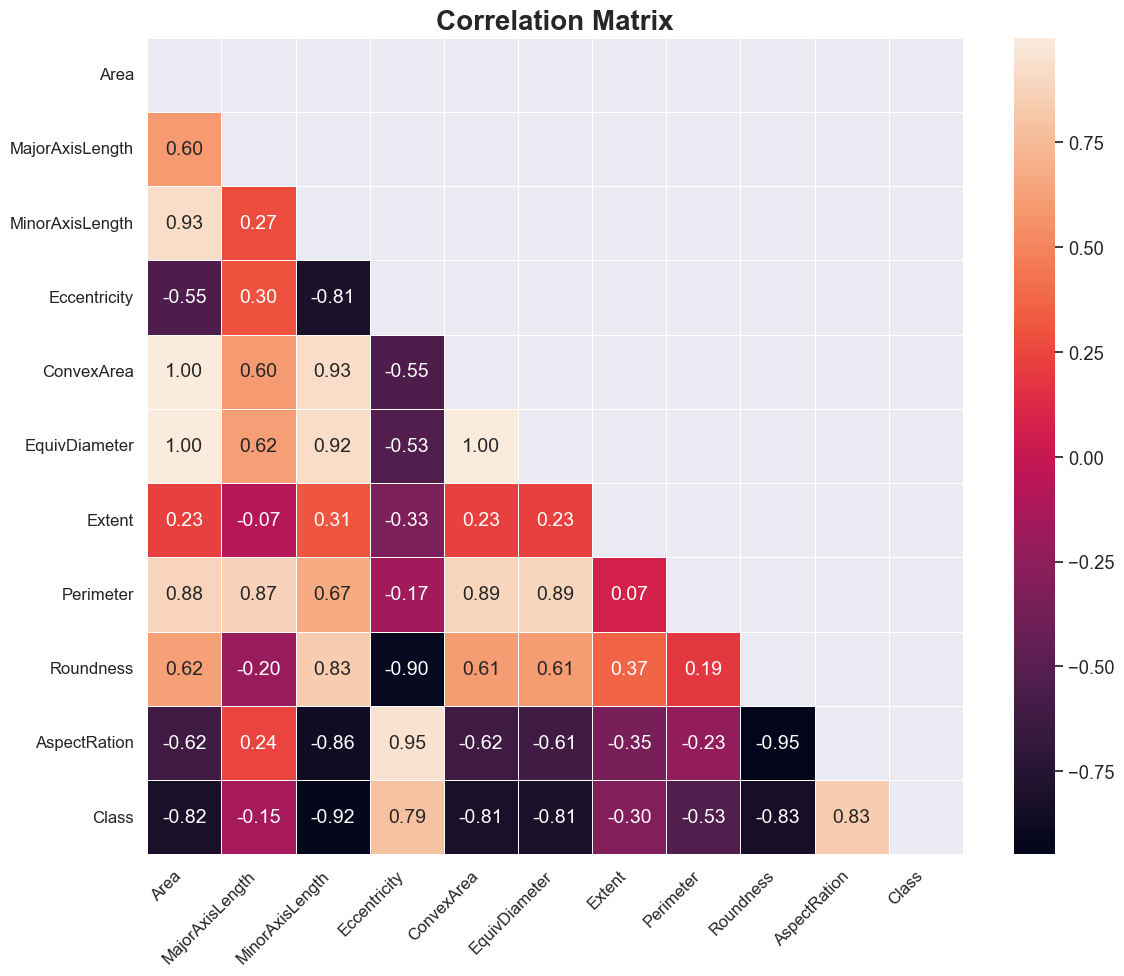

In [14]:
corr_features = correlation_mat.index

plt.figure(figsize=(12,10))
sns.set(font_scale=1.2)

# Set mask to display only the lower triangular part of the heatmap
mask = np.zeros_like(df[corr_features].corr())
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(df[corr_features].corr(), annot=True, fmt='.2f', 
                linewidths=.5, annot_kws={"size": 14}, mask=mask)

g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right', fontsize=12)
g.set_yticklabels(g.get_yticklabels(), rotation=0, ha='right', fontsize=12)
plt.title('Correlation Matrix', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


**INFERENCE:**

**The highest negative correlations are between:**

* feature-to-feature - Roundness and AspectRatio (-0.95), Roundness and Eccentricity (-0.90), MinorAxisLength and AxisRatio (-0.86), MinorAxisLength and Eccentricity (-0.81).

* feature-to-class - MinorAxisLength (-0.92), Roundness (-0.83), Area (-0.82), ConvexArea (-0.81), EquivDiameter (-0.81).

**The highest positive correlations are between:**

* feature-to-feature - AspectRatio and Eccentricity (0.95), Area and MinorAxisLength (0.93), MinorAxisLength and ConvexArea (0.93), MinorAxisLength and EquivDiameter (0.92), ConvexArea and Perimeter (0.89), EquivDiameter and Perimeter (0.89), Area and Perimeter (0.88), MajorAxisLength and Perimeter (0.87), MinorAxisLength and Roundness (0.83).

* feature-to-class - AspectRatio (0.83), Eccentricity (0.79).

**We can see that MinorAxisLength, AspectRatio, Roundness, Area, ConvexArea, EquivDiameter and Eccentricity have a very high correlation with the target variable.**

### Check Multicollinearity by using VIF

Multicollinearity can be calculated using Variable Inflation Factors (VIF). Unlike Correlation matrix, VIF determines the strength of the correlation of a variable with several other independent variables in a dataset. VIF usually starts at 1 and anywhere exceeding 10 indicates high multicollinearity between the independent variables.

In [15]:
def VIF(dataframe,chosen_cols):
    from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
    from statsmodels.tools.tools import add_constant
    X=dataframe[chosen_cols]
    X=add_constant(X)
    vif_data=pd.DataFrame()
    vif_data["feature"]=X.columns
    vif_data["VIF"]=[VIF(X.values, i) for i in range(len(X.columns))]
    return vif_data

In [16]:
chosen_cols=['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness', 'AspectRation']

VIF(df,chosen_cols)

,feature,VIF
0,const,103954.790226
1,Area,2347.459870
2,MajorAxisLength,318.714833
3,MinorAxisLength,1296.490608
4,Eccentricity,51.971818
5,ConvexArea,1813.854237
6,EquivDiameter,2844.995049
7,Extent,1.157557
8,Perimeter,346.462939
9,Roundness,157.668241


**In the context of calculating VIF, a VIF value of 10 or higher is often considered significant multicollinearity between the independent variables. From the result, it shows that there are some features with extremely high VIF values. Let’s try to drop some of the correlated features to see if it helps us in bringing down the multicollinearity between correlated features.**

In [17]:
new_chosen_cols=["MajorAxisLength","Roundness","Eccentricity","Extent"]
VIF(df,new_chosen_cols)

,feature,VIF
0,const,8707.834300
1,MajorAxisLength,1.123905
2,Roundness,5.753991
3,Eccentricity,5.876661
4,Extent,1.155467


**VIF values for all the independent variables have decreased to a reasonable extent.**

# 3.0 Data Preprocessing

### Inter Quartile Range to detect outliers

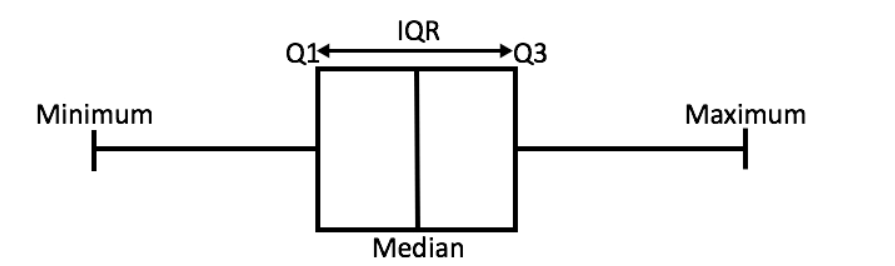

* Minimum indicates the minimum value in the dataset and maximum is the maximum value in the dataset. So the difference between the two tells us about the range of dataset.

* The median is the median (or centre point), also called second quartile of the data (resulting from the fact that the data is  in an ordered manner).

* Q1 is the first quartile of the data, stating that 25% of the data lies between minimum and Q1.

* Q3 is the third quartile of the data, stating that 75% of the data lies between minimum and Q3.

* The difference between Q3 and Q1 is called the Inter-Quartile Range or IQR.

### Box Plot of each feature before Outlier Detection

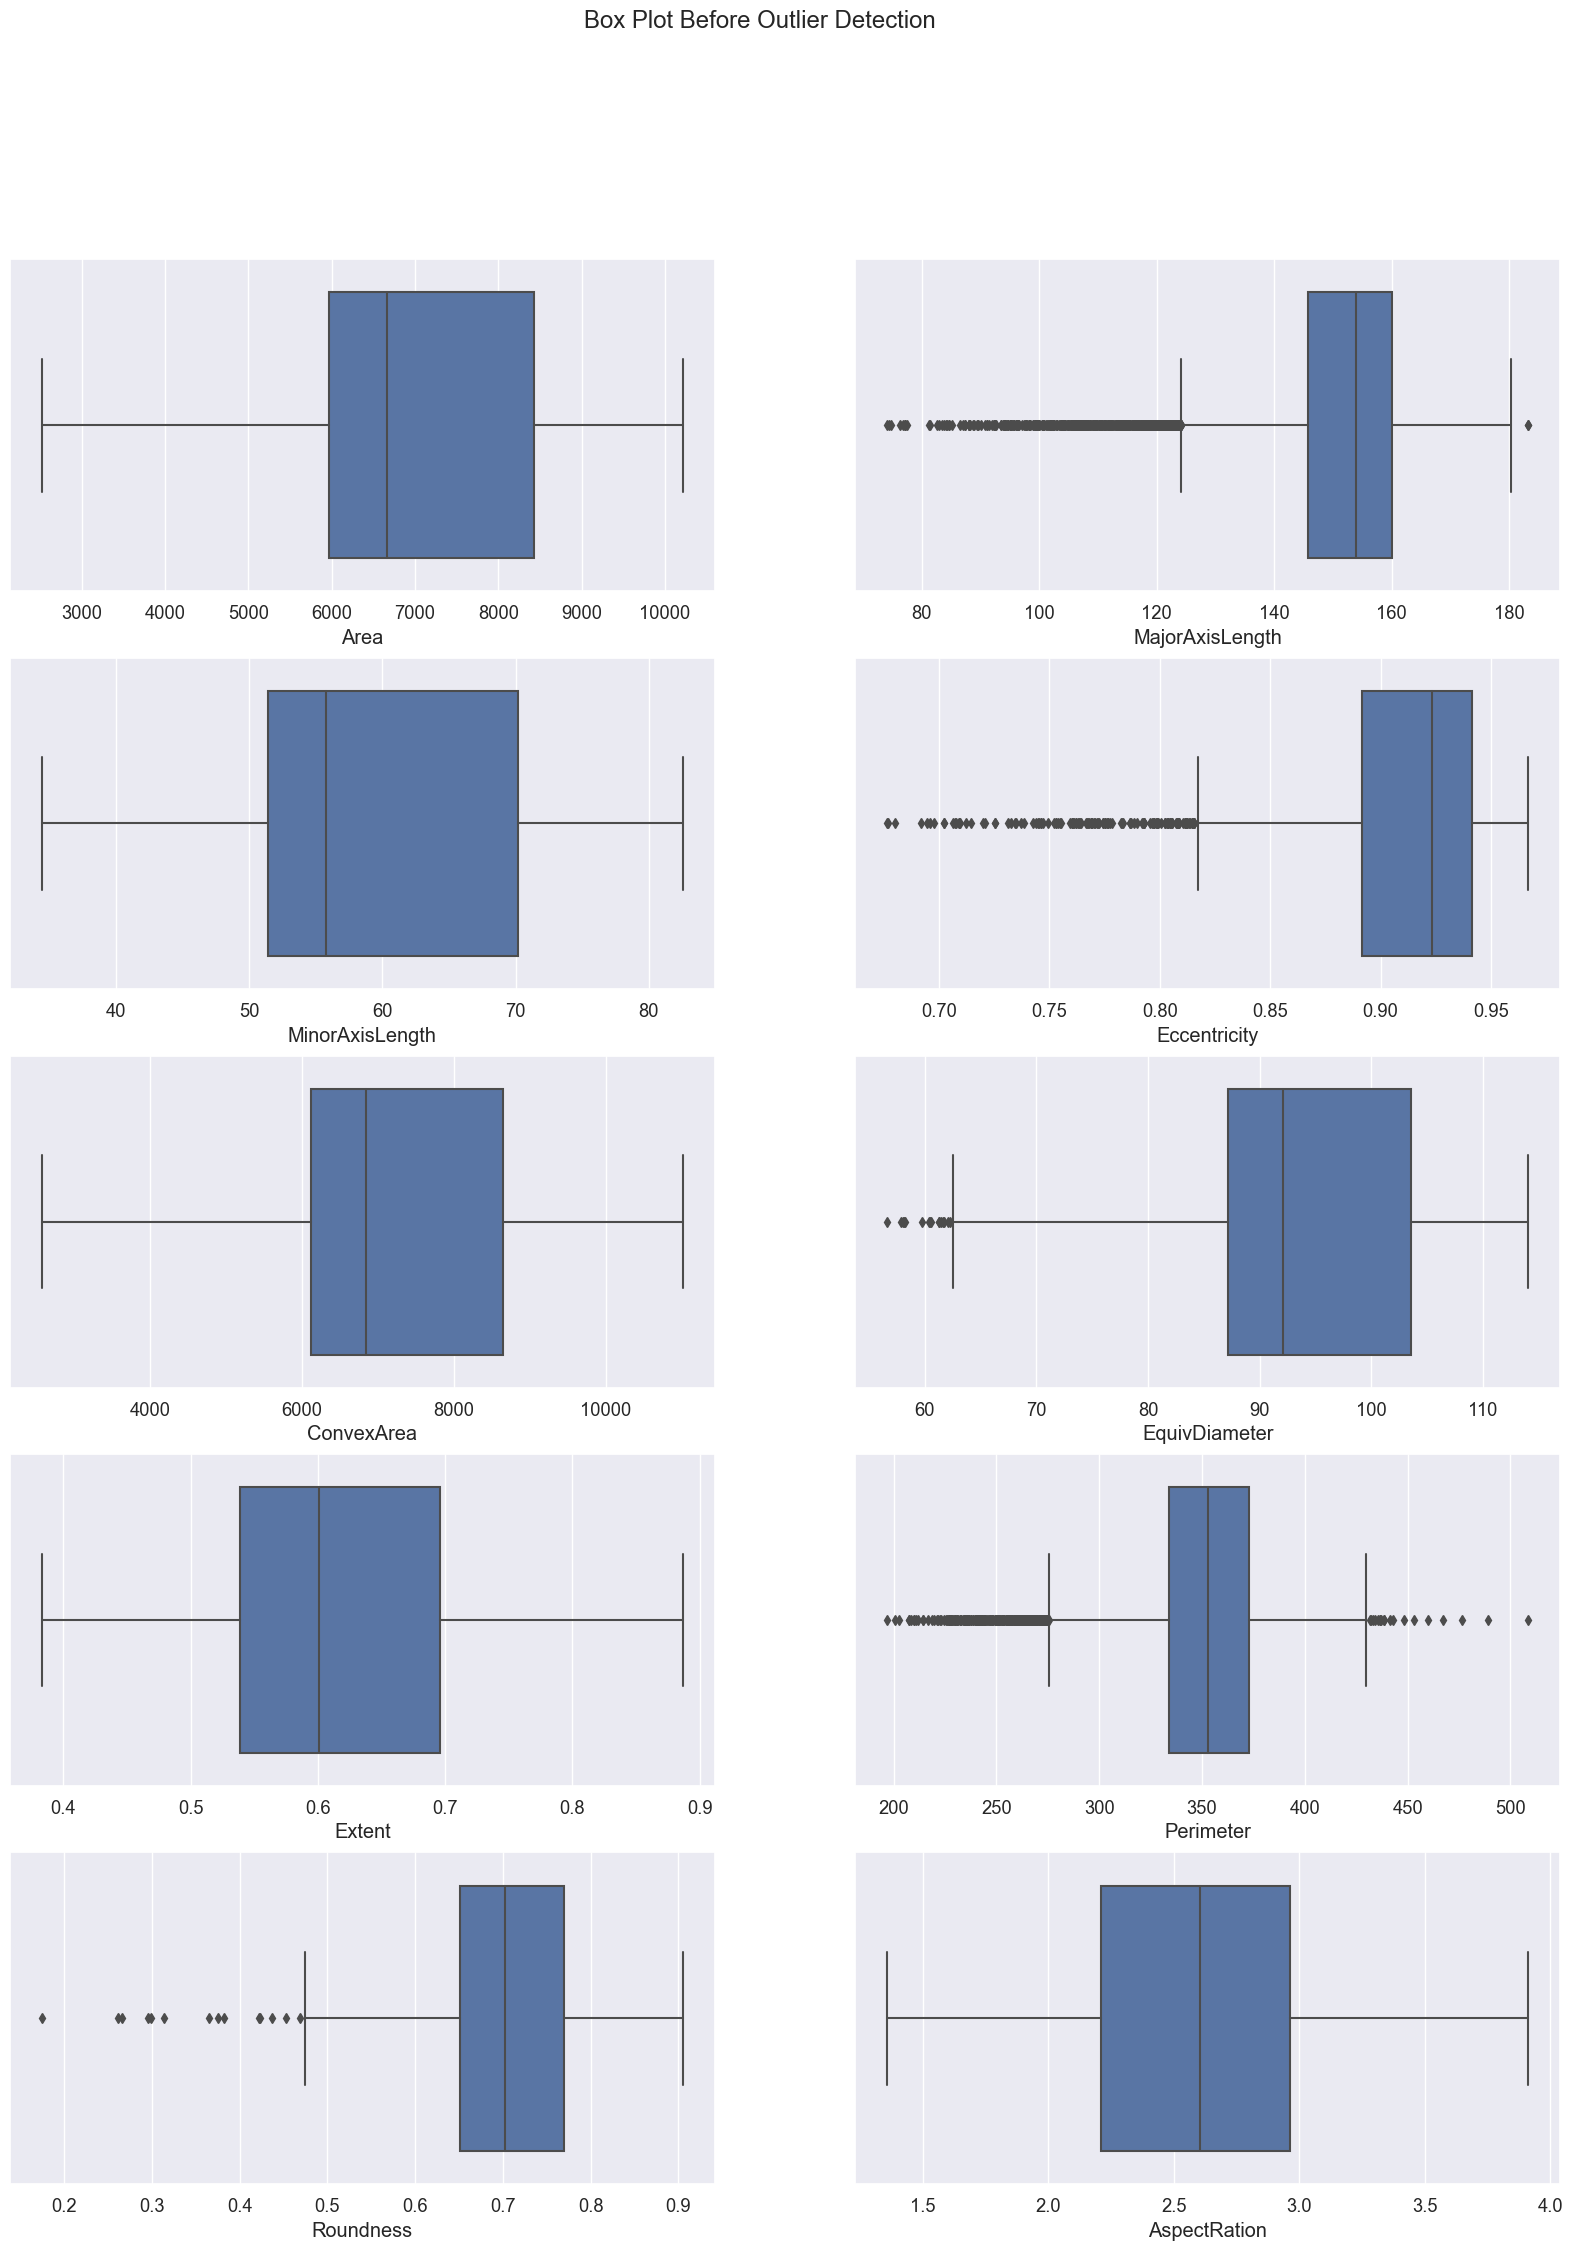

In [18]:
fig, axes = plt.subplots(5,2, figsize=(20,25))
fig.suptitle('Box Plot Before Outlier Detection')
k = 0
for i in range(0,5):
    for j in range(0,2):
        sns.boxplot(ax=axes[i,j], data=df, x=df.columns[k])
        k=k+1

### Removing the outliers

In [19]:
 """
    Calculates the Interquartile Range (IQR) for a given column in df 
    Returns the upper and lower bounds of the IQR.
"""
def iqr_calculation(col):
    Q1 = np.percentile(col, 25)
    Q3 = np.percentile(col, 75)
    IQR = Q3 - Q1
    upper = np.where(col >= (Q3 + 1.5 * IQR))[0]
    lower = np.where(col <= (Q1 - 1.5 * IQR))[0]
    return upper, lower
    
def remove_outliers(df, col_name):
    upper, lower = iqr_calculation(df[col_name])
    if len(upper) == 0 and len(lower) == 0:
        print("No outliers are removed")
        return df
    else:
        df = df.drop(upper).drop(lower)
        print("New Shape: ", df.shape)
        return df.reset_index(drop=True)

In [20]:
main_df = df.copy()

for col in main_df.columns[:-1]:
    print('For', col)
    main_df = remove_outliers(main_df, col)

df = main_df

For Area
No outliers are removed
For MajorAxisLength
New Shape:  (17647, 11)
For MinorAxisLength
No outliers are removed
For Eccentricity
New Shape:  (17631, 11)
For ConvexArea
No outliers are removed
For EquivDiameter
No outliers are removed
For Extent
No outliers are removed
For Perimeter
New Shape:  (17602, 11)
For Roundness
New Shape:  (17597, 11)
For AspectRation
No outliers are removed


### Box Plot of each feature after Outlier Detection

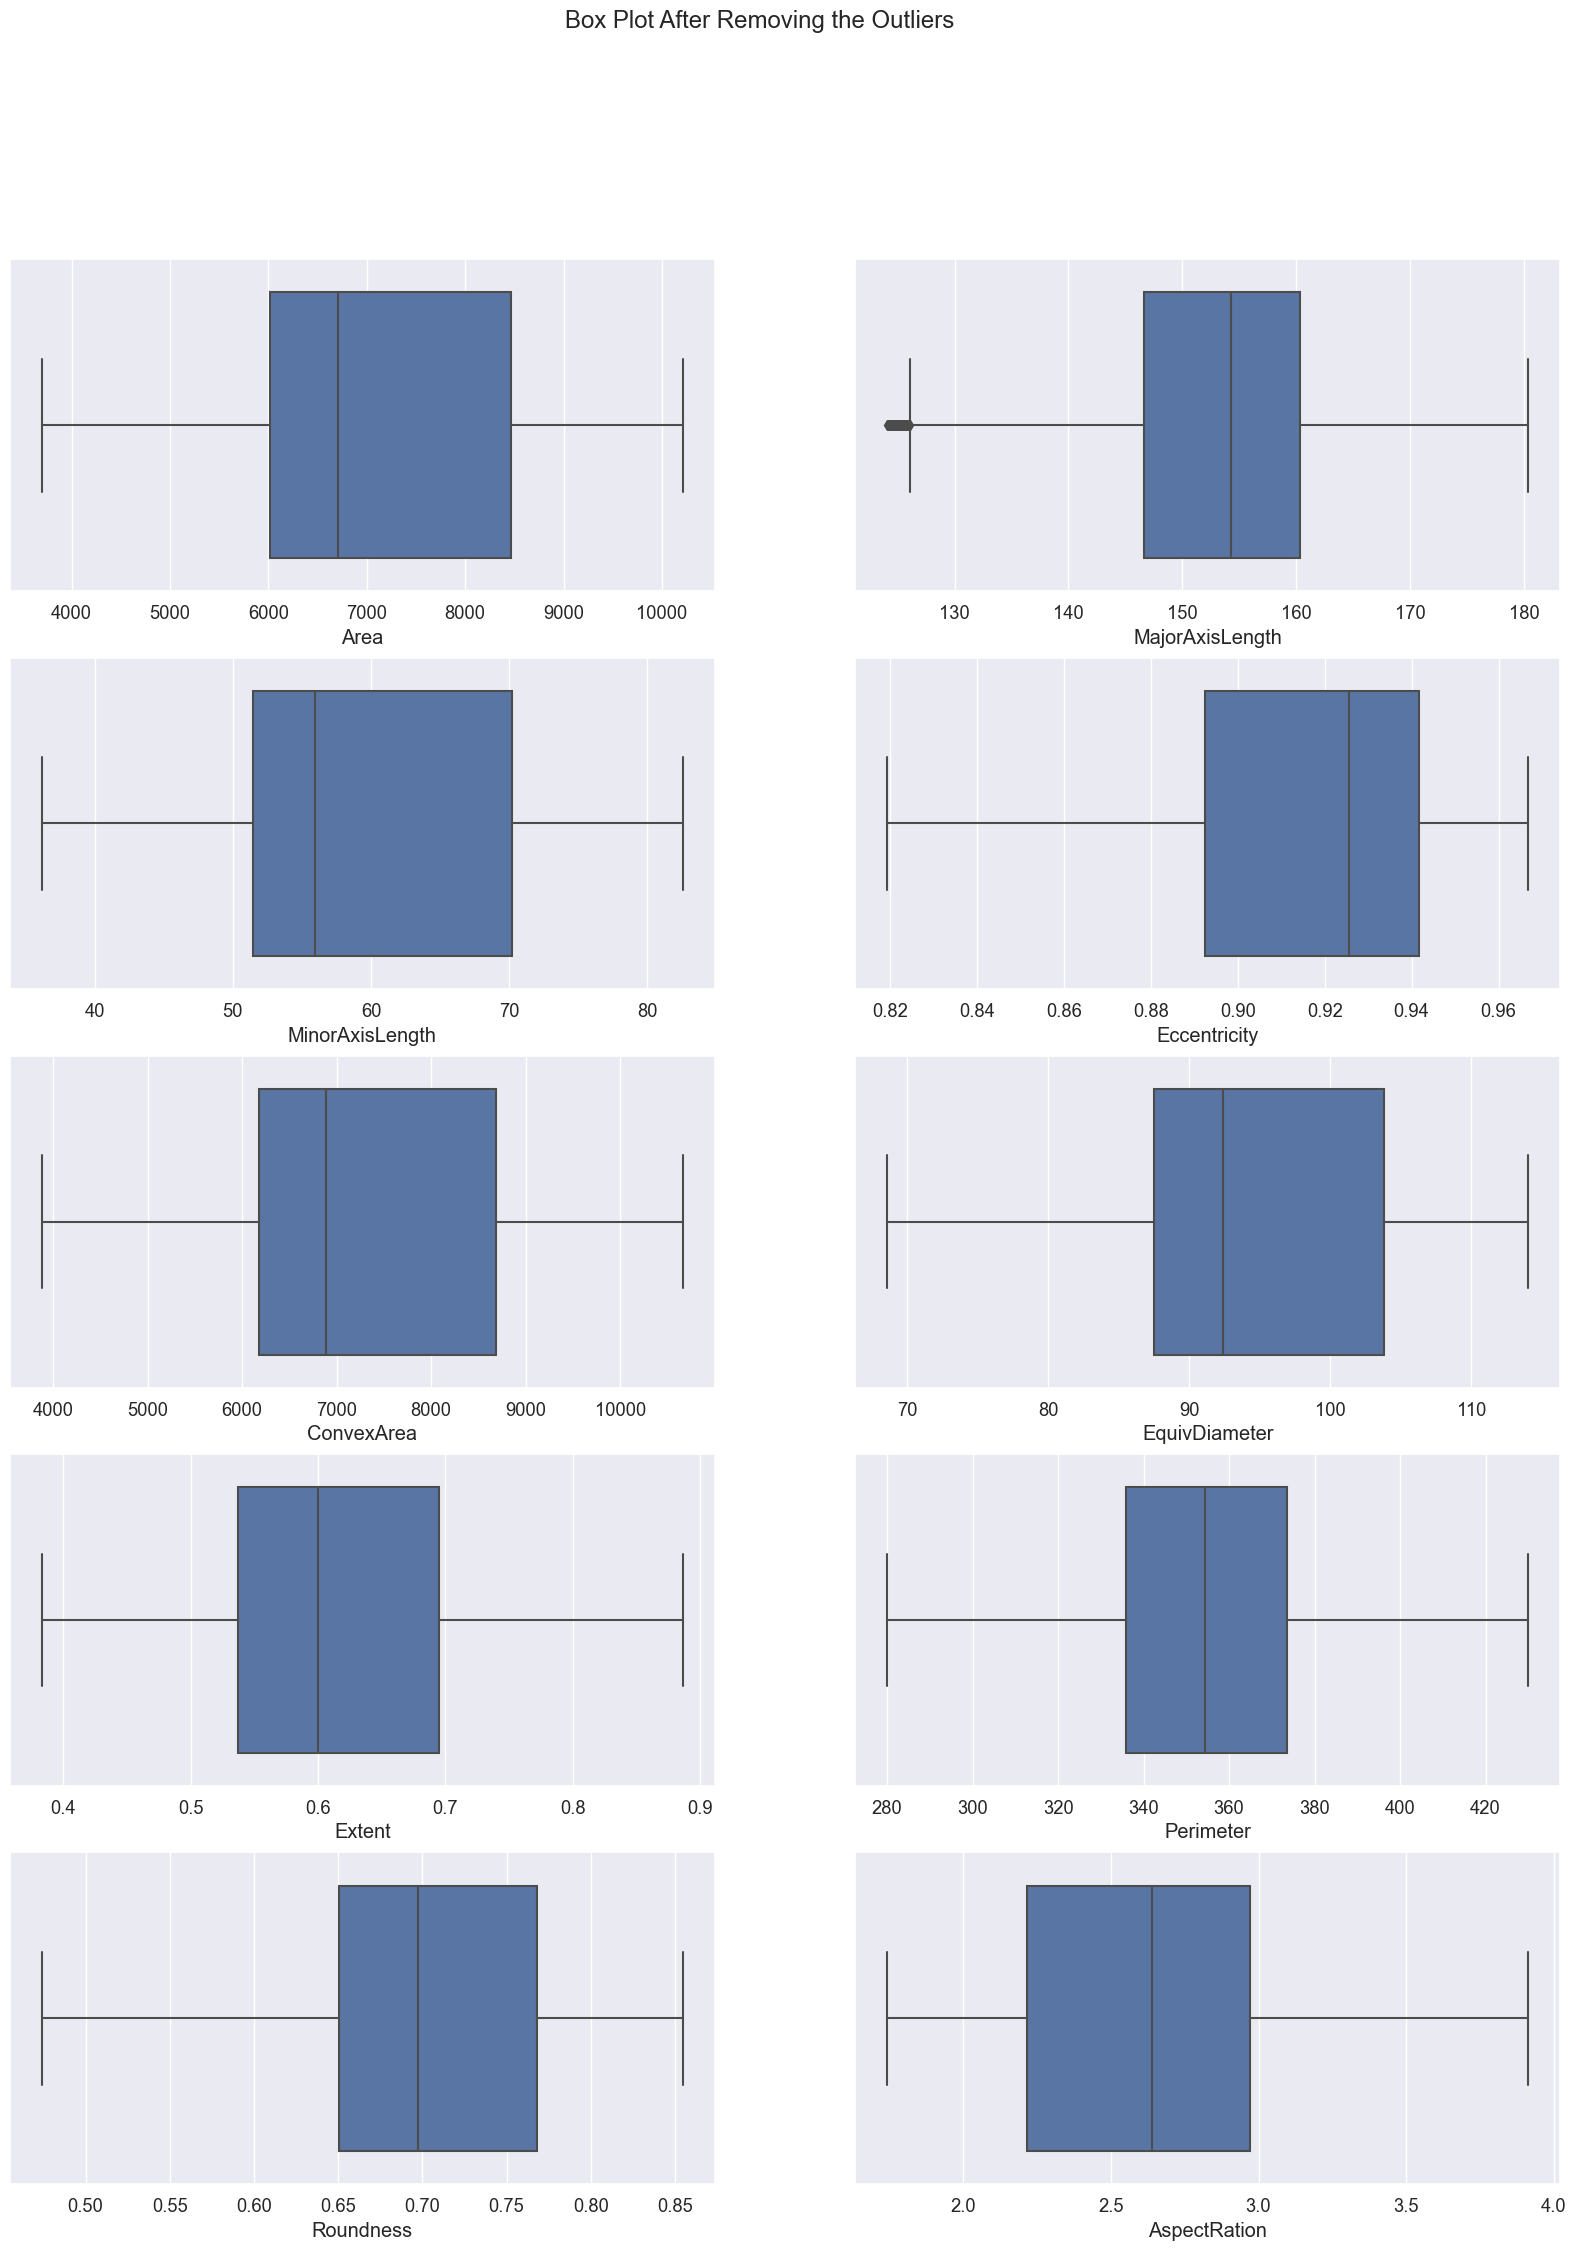

In [21]:
fig, axes = plt.subplots(5,2, figsize=(20,25))
fig.suptitle('Box Plot After Removing the Outliers')
k = 0
for i in range(0,5):
    for j in range(0,2):
        col_name = df.columns[k]
        sns.boxplot(ax=axes[i,j], data=main_df,x=col_name)
        k=k+1

In [22]:
df.shape

(17597, 11)

# 4.0 Splitting the Dataset

In [23]:
X=df[["MajorAxisLength","Roundness","Eccentricity","Extent"]]
Y=df["Class"]

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

### Standardization

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.22947603, -0.79852573,  0.73387877,  0.50650271],
       [ 0.37240698,  0.76111001, -0.96377629, -0.11797718],
       [ 0.59292898, -1.66834014,  1.56394508, -1.88201494],
       ...,
       [ 1.08939692, -0.82063083,  0.91627689, -1.31857217],
       [-0.10765373, -0.9658156 ,  0.32824037, -1.03881585],
       [ 0.40863635,  0.80903888, -0.66096941, -0.4926156 ]])

In [25]:
X_test = scaler.transform(X_test)
X_test

array([[-1.17932721, -0.29294766,  0.44123002, -0.43392902],
       [ 1.35059936, -0.21465292,  0.65135606, -1.26869849],
       [ 1.0511613 ,  1.14707079, -1.48612111, -0.17214309],
       ...,
       [-1.29257639,  0.76827926, -1.07253233,  0.12099944],
       [ 0.06774699,  0.56091168, -0.43711659,  1.4088493 ],
       [ 0.5792953 , -0.98653376,  1.12399191,  1.10935002]])

# 5.0 Modelling

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Logistic Regression

In [27]:
logreg = LogisticRegression()
log_model = logreg.fit(X_train, y_train)

In [28]:
y_pred_log = logreg.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:, 1]
acc_log = logreg.score(X_test, y_test)
print('Accuracy of Logistic Regression classifier on test set: {:.7f}'.format(acc_log))

Accuracy of Logistic Regression classifier on test set: 0.9903409


In [29]:
cm_log = confusion_matrix(y_test, y_pred_log)
print(cm_log)

[[2371   38]
 [  13 2858]]


<AxesSubplot:>

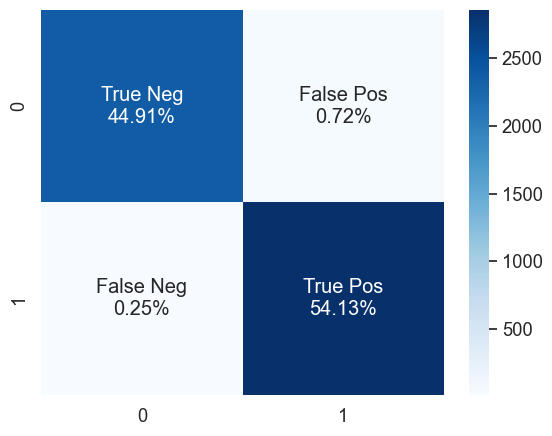

In [30]:
plt.figure(figsize=(6.5,5))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cm_log.flatten()/np.sum(cm_log)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_log, annot=labels, fmt='', cmap='Blues')

In [31]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2409
           1       0.99      1.00      0.99      2871

    accuracy                           0.99      5280
   macro avg       0.99      0.99      0.99      5280
weighted avg       0.99      0.99      0.99      5280



## K-NN

Minimum error:- 0.00946969696969697 at K = 7


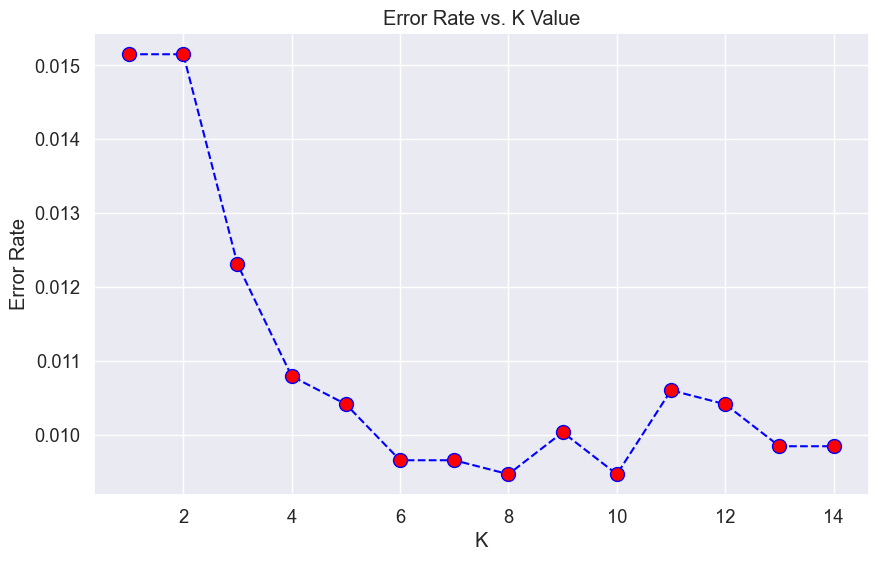

In [32]:
error_rate = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.990530303030303 at K = 7


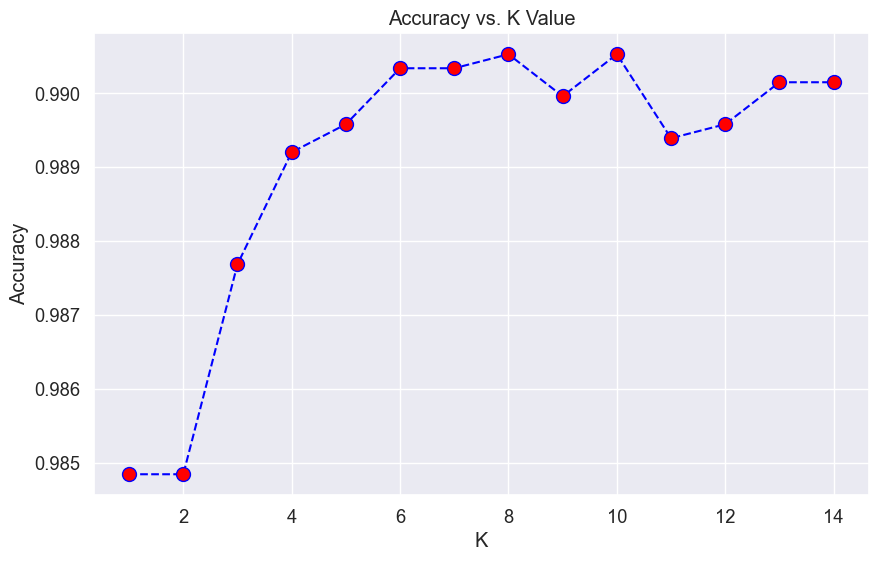

In [33]:
acc = []
for i in range(1,15):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,15),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [34]:
knn = KNeighborsClassifier(n_neighbors=7)
knn_model = knn.fit(X_train, y_train)

In [35]:
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]
acc_knn = knn.score(X_test, y_test)
print('Accuracy of K-NN classifier on test set: {:.7f}'.format(acc_knn))

Accuracy of K-NN classifier on test set: 0.9903409


In [36]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[2369   40]
 [  11 2860]]


<AxesSubplot:>

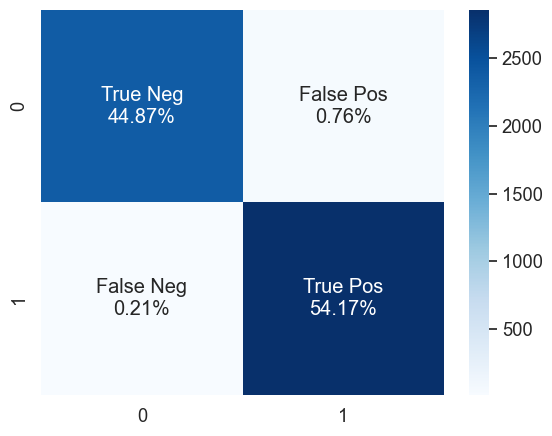

In [37]:
plt.figure(figsize=(6.5,5))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cm_knn.flatten()/np.sum(cm_knn)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_log, annot=labels, fmt='', cmap='Blues')

In [38]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2409
           1       0.99      1.00      0.99      2871

    accuracy                           0.99      5280
   macro avg       0.99      0.99      0.99      5280
weighted avg       0.99      0.99      0.99      5280



## Decision Tree

In [39]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)

In [40]:
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]
acc_dt = dt.score(X_test, y_test)
print('Accuracy of Decision Tree classifier on test set: {:.7f}'.format(acc_dt))

Accuracy of Decision Tree classifier on test set: 0.9827652


In [41]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

[[2366   43]
 [  48 2823]]


<AxesSubplot:>

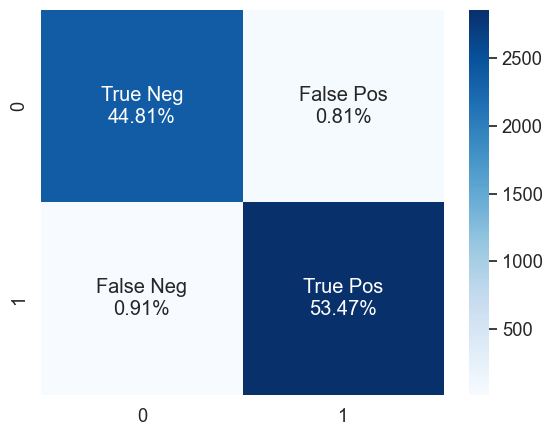

In [42]:
plt.figure(figsize=(6.5,5))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cm_dt.flatten()/np.sum(cm_dt)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_log, annot=labels, fmt='', cmap='Blues')

In [43]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2409
           1       0.98      0.98      0.98      2871

    accuracy                           0.98      5280
   macro avg       0.98      0.98      0.98      5280
weighted avg       0.98      0.98      0.98      5280



## Random Forest

In [44]:
rf = RandomForestClassifier(oob_score=True)
rf_model = rf.fit(X_train,y_train)

In [45]:
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
acc_rf = rf.score(X_test, y_test)
print('Accuracy of Random Forest classifier on test set: {:.7f}'.format(acc_rf))

Accuracy of Random Forest classifier on test set: 0.9912879


In [46]:
print(rf.oob_score_)

0.9880652756353008


In [47]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[2379   30]
 [  16 2855]]


<AxesSubplot:>

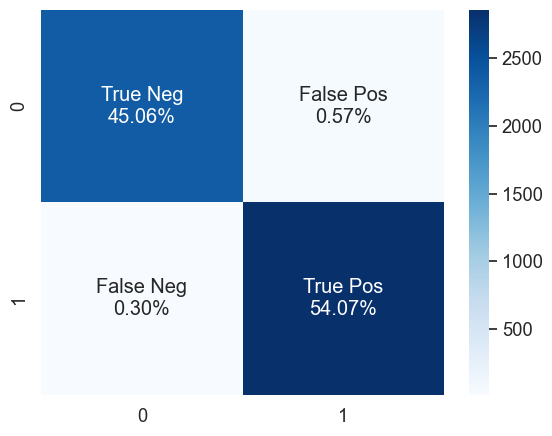

In [48]:
plt.figure(figsize=(6.5,5))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cm_rf.flatten()/np.sum(cm_rf)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_log, annot=labels, fmt='', cmap='Blues')

In [49]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2409
           1       0.99      0.99      0.99      2871

    accuracy                           0.99      5280
   macro avg       0.99      0.99      0.99      5280
weighted avg       0.99      0.99      0.99      5280



## Support Vector Machine

In [50]:
svc = SVC(probability=True)
svc_model = svc.fit(X_train,y_train)

In [51]:
y_pred_svc = svc.predict(X_test)
y_proba_svc = svc_model.predict_proba(X_test)[:, 1]
acc_svc = svc.score(X_test, y_test)
print('Accuracy of Support Vector classifier on test set: {:.7f}'.format(acc_svc))

Accuracy of Support Vector classifier on test set: 0.9899621


In [52]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
print(cm_svc)

[[2370   39]
 [  14 2857]]


<AxesSubplot:>

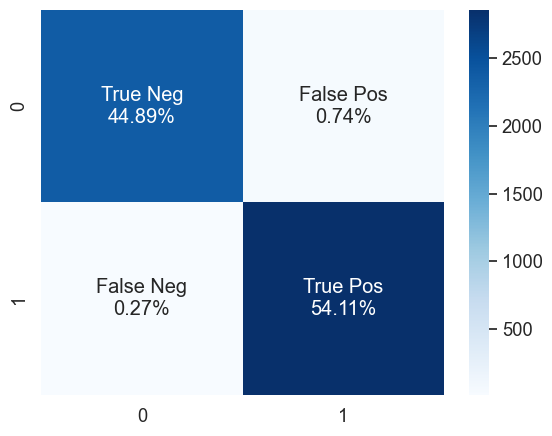

In [53]:
plt.figure(figsize=(6.5,5))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cm_svc.flatten()/np.sum(cm_svc)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_log, annot=labels, fmt='', cmap='Blues')

In [54]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2409
           1       0.99      1.00      0.99      2871

    accuracy                           0.99      5280
   macro avg       0.99      0.99      0.99      5280
weighted avg       0.99      0.99      0.99      5280



# 6.0 Evaluation

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.calibration import calibration_curve

## Model Accuracy Comparison

| Models                                                       	| Accuracy on Testing Set 	|
|:-------------------------------------------------------------	|:-------------------------:|
| Logistic Regression                                       	| 0.9903409                	|
| K Nearest Neighbor                                        	| 0.9903409                	|  
| Decision Tree                                             	| 0.9827652                	| 
| Random Forest                                             	| 0.9912879                	|  
| Support Vector Machine                                    	| 0.9899621                	|  

Text(0, 0.5, 'Accuracy')

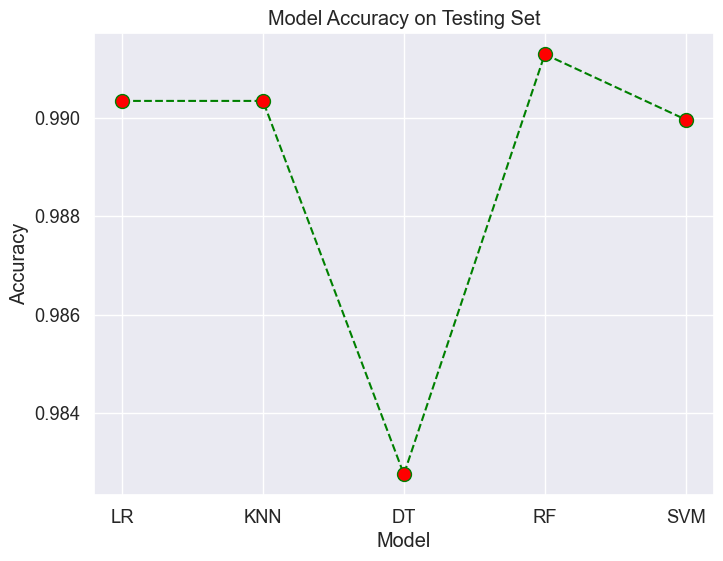

In [56]:
model_acc = [acc_log, acc_knn, acc_dt, acc_rf, acc_svc]
models = ['LR', 'KNN', 'DT', 'RF', 'SVM']

plt.figure(figsize=(8,6))
plt.plot(models, model_acc, color = 'green', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Model Accuracy on Testing Set')
plt.xlabel('Model')
plt.ylabel('Accuracy')

## K-Fold Cross Validation (w/ training data)

In [57]:
k = 5

"""LR"""
cv_scores_log = cross_val_score(log_model, X_train, y_train, cv=k)
cv_mean_log = cv_scores_log.mean()
print("Cross validation scores for LR:", cv_scores_log)
print("Mean cross validation score for LR: {:.7f}".format(cv_mean_log))
print()

"""KNN"""
cv_scores_knn = cross_val_score(knn_model, X_train, y_train, cv=k)
cv_mean_knn = cv_scores_knn.mean()
print("Cross validation scores for KNN:", cv_scores_knn)
print("Mean cross validation score for KNN: {:.7f}".format(cv_mean_knn))
print()

"""DT"""
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=k)
cv_mean_dt = cv_scores_dt.mean()
print("Cross validation scores for DT:", cv_scores_dt)
print("Mean cross validation score for DT: {:.7f}".format(cv_mean_dt))
print()

"""RF"""
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=k)
cv_mean_rf = cv_scores_rf.mean()
print("Cross validation scores for RF:", cv_scores_rf)
print("Mean cross validation score for RF: {:.7f}".format(cv_mean_rf))
print()

"""SVM"""
cv_scores_svc = cross_val_score(svc_model, X_train, y_train, cv=k)
cv_mean_svc = cv_scores_svc.mean()
print("Cross validation scores for SVM:", cv_scores_svc)
print("Mean cross validation score for SVM: {:.7f}".format(cv_mean_svc))

Cross validation scores for LR: [0.98782468 0.99147727 0.9910678  0.98660171 0.98822574]
Mean cross validation score for LR: 0.9890394

Cross validation scores for KNN: [0.98579545 0.99107143 0.98781973 0.98781973 0.98700771]
Mean cross validation score for KNN: 0.9879028

Cross validation scores for DT: [0.98214286 0.98011364 0.98091758 0.97807552 0.98375964]
Mean cross validation score for DT: 0.9810018

Cross validation scores for RF: [0.98579545 0.99066558 0.98822574 0.98660171 0.98741372]
Mean cross validation score for RF: 0.9877404

Cross validation scores for SVM: [0.98904221 0.99066558 0.99025579 0.98822574 0.98863175]
Mean cross validation score for SVM: 0.9893642


| Models                                                       	| Mean Cross Validation Score	|
|:-------------------------------------------------------------	|:-----------------------------:|
| Logistic Regression                                       	| 0.9890394                 	|
| K Nearest Neighbor                                        	| 0.9879028                 	|  
| Decision Tree                                             	| 0.9809206                 	| 
| Random Forest                                             	| 0.9879838                 	|  
| Support Vector Machine                                    	| 0.9893642                 	|  

Text(0, 0.5, 'Mean CV Score')

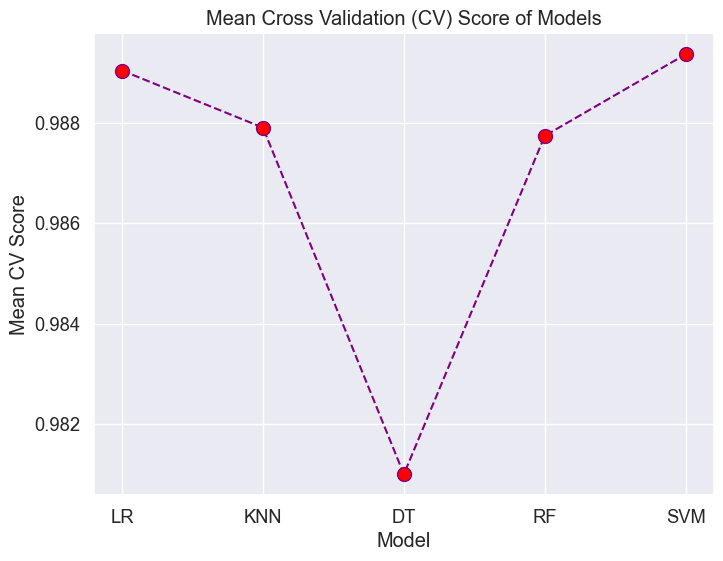

In [58]:
cv_mean = [cv_mean_log, cv_mean_knn, cv_mean_dt, cv_mean_rf, cv_mean_svc]
models = ['LR', 'KNN', 'DT', 'RF', 'SVM']

plt.figure(figsize=(8,6))
plt.plot(models, cv_mean, color = 'purple', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Mean Cross Validation (CV) Score of Models')
plt.xlabel('Model')
plt.ylabel('Mean CV Score')

## ROC Curve

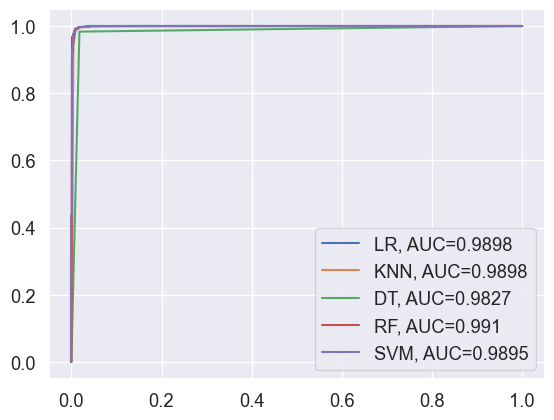

In [59]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_proba_log)
auc = round(metrics.roc_auc_score(y_test, y_pred_log), 4)
plt.plot(fpr,tpr,label="LR, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_proba_knn)
auc = round(metrics.roc_auc_score(y_test, y_pred_knn), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_proba_dt)
auc = round(metrics.roc_auc_score(y_test, y_pred_dt), 4)
plt.plot(fpr,tpr,label="DT, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_proba_rf)
auc = round(metrics.roc_auc_score(y_test, y_pred_rf), 4)
plt.plot(fpr,tpr,label="RF, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_proba_svc)
auc = round(metrics.roc_auc_score(y_test, y_pred_svc), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

plt.legend()

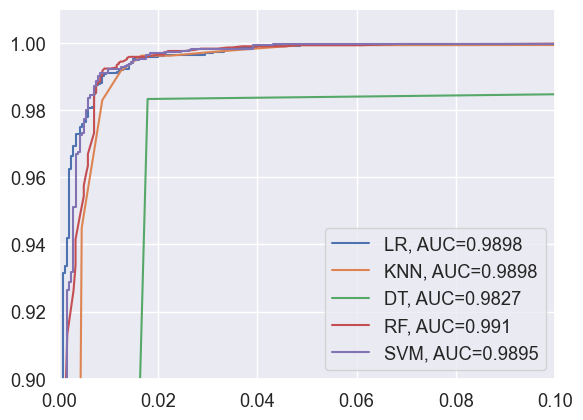

In [60]:
plt.xlim(0.0, 0.1)
plt.ylim(0.9, 1.01)

fpr, tpr, _ = metrics.roc_curve(y_test, y_proba_log)
auc = round(metrics.roc_auc_score(y_test, y_pred_log), 4)
plt.plot(fpr,tpr,label="LR, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_proba_knn)
auc = round(metrics.roc_auc_score(y_test, y_pred_knn), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_proba_dt)
auc = round(metrics.roc_auc_score(y_test, y_pred_dt), 4)
plt.plot(fpr,tpr,label="DT, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_proba_rf)
auc = round(metrics.roc_auc_score(y_test, y_pred_rf), 4)
plt.plot(fpr,tpr,label="RF, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_proba_svc)
auc = round(metrics.roc_auc_score(y_test, y_pred_svc), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

plt.legend()

## Calibration Curve

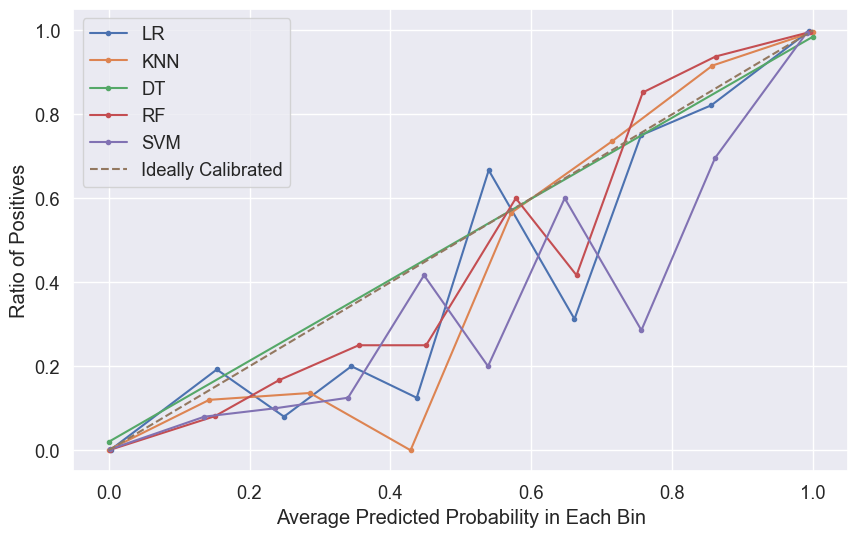

In [61]:
plt.figure(figsize=(10,6))

x_log, y_log = calibration_curve(y_test, y_proba_log, n_bins = 10, normalize = True)
x_knn, y_knn = calibration_curve(y_test, y_proba_knn, n_bins = 10, normalize = True)
x_dt, y_dt = calibration_curve(y_test, y_proba_dt, n_bins = 10, normalize = True)
x_rf, y_rf = calibration_curve(y_test, y_proba_rf, n_bins = 10, normalize = True)
x_svc, y_svc = calibration_curve(y_test, y_proba_svc, n_bins = 10, normalize = True)

plt.plot(y_log, x_log, marker = '.', label = 'LR')
plt.plot(y_knn, x_knn, marker = '.', label = 'KNN')
plt.plot(y_dt, x_dt, marker = '.', label = 'DT')
plt.plot(y_rf, x_rf, marker = '.', label = 'RF')
plt.plot(y_svc, x_svc, marker = '.', label = 'SVM')
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')

leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in Each Bin')
plt.ylabel('Ratio of Positives')
plt.show()